# Prédiction du cours des actions d'Apple 

### L'objectif de cette partie est que si l'on connait la valeur des actions de Apple jusqu'au jour J, on peut déterminer le prix de l'action au jour J+1 et ainsi savoir si l'on doit acheter ou non.

## 0 - Préparatifs généraux

On commence par importer toutes les biblothèques nécéssaires

In [172]:
import matplotlib.pyplot as plt # Pour les graphiques
import numpy as np
import yfinance as yf # Pour extraire les données de yahoo finance
import pandas as pd # Pour manipuler des data frames
from datetime import datetime

Entrer la date pour extraire le CSV le plus récent de yahoo finance.

In [173]:
user_date_input = input("Entrez la date d'aujourd'hui (format AAAA-MM-JJ): ")
input_date = datetime.strptime(user_date_input, "%Y-%m-%d")

## I - Récupération des données 

Concernant la récupération des données, on récupére via la bibliothèque yfinance, que l'on transforme par la suite en CSV et en dataframe panda

Création du "Ticker" pour Apple, nécéssaire pour extraire les données sur Yahoo Finance

In [174]:
APL = "AAPL"

In [175]:
data = yf.Ticker(APL) # Extraction avec la fonction yf.Ticker de yfinance
prix_rec = data.history(period = '1d', start = '2020-1-1', end = input_date) # On choisit une date de fin arbitraire
prix_anc = data.history(period = '1d', start = '1980-12-12', end = '2023-12-30') 

In [176]:
prix_rec.to_csv('AAPLt.csv')

In [177]:
df=pd.read_csv("AAPLt.csv")  # Passage en pandas 
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-05:00,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03 00:00:00-05:00,72.373264,73.208666,72.214952,72.441460,146322800,0.0,0.0
2,2020-01-06 00:00:00-05:00,71.554906,73.057655,71.301603,73.018684,118387200,0.0,0.0
3,2020-01-07 00:00:00-05:00,73.028440,73.286611,72.453647,72.675285,108872000,0.0,0.0
4,2020-01-08 00:00:00-05:00,72.375706,74.148808,72.375706,73.844360,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
1000,2023-12-21 00:00:00-05:00,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
1002,2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
1003,2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48053800,0.0,0.0


Il y a tout de même un léger nettoyage à faire, concernant les dates

In [178]:
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str.slice(0, 10)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03,72.373264,73.208666,72.214952,72.441460,146322800,0.0,0.0
2,2020-01-06,71.554906,73.057655,71.301603,73.018684,118387200,0.0,0.0
3,2020-01-07,73.028440,73.286611,72.453647,72.675285,108872000,0.0,0.0
4,2020-01-08,72.375706,74.148808,72.375706,73.844360,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
1000,2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
1002,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
1003,2023-12-27,192.490005,193.500000,191.089996,193.149994,48053800,0.0,0.0


In [179]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,72.151622,73.213538,71.895889,73.152649,135480400,0.0,0.0
1,2020-01-03,72.373264,73.208666,72.214952,72.441460,146322800,0.0,0.0
2,2020-01-06,71.554906,73.057655,71.301603,73.018684,118387200,0.0,0.0
3,2020-01-07,73.028440,73.286611,72.453647,72.675285,108872000,0.0,0.0
4,2020-01-08,72.375706,74.148808,72.375706,73.844360,132079200,0.0,0.0
...,...,...,...,...,...,...,...,...
1000,2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
1002,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
1003,2023-12-27,192.490005,193.500000,191.089996,193.149994,48053800,0.0,0.0


## II - Premières visualisations descriptives de la base de données

On définit cette fonction qui va nous permettre d'afficher nos séries temporelles de manière plus facile en jouant sur tous les paramètres en entrée.

In [180]:
def plot_series(time, series, format="-", start=0, end=None, label=None): 
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)


### II.1 - Prix de l'action à la fermeture du marché

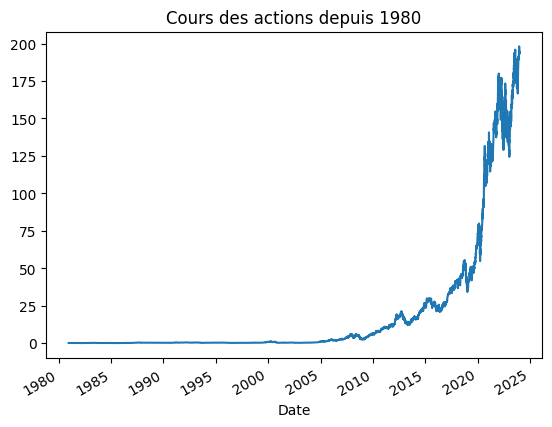

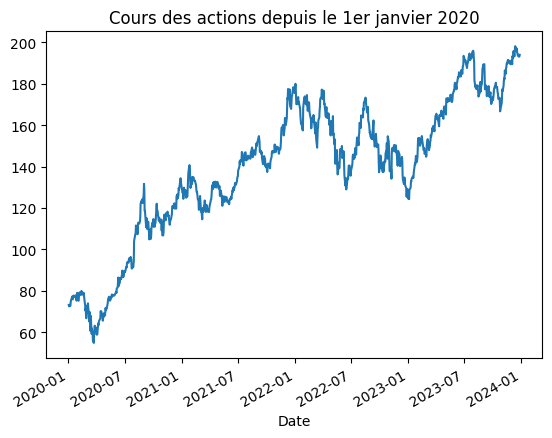

In [181]:
plt.title('Cours des actions depuis 1980')
prix_anc['Close'].plot() # Depuis 1980
plt.show()

plt.title('Cours des actions depuis le 1er janvier 2020')
prix_rec['Close'].plot() # Depuis 2020
plt.show()



### II.2 - Comparaison des valeurs de fermeture et d'ouverture

On définit des grandeurs qui vont nous servir plus tard, pour zoomer sur certaines parties par exemple. En particulier, on change la manière dont on compte le temps. Pour mieux le manipuler, on le transforme en tableau de taille correpondante au nombre de jours écoulés depuis le 2020-01-01

Pour ce faire, on a besoin d'une petite fonction car la taille du tableau va dépendre de l'input

In [182]:
time = np.arange(len(df['Close']))  # Intervalle de temps : tous les jours depuis le 2020-01-01

split_time = int(2*len(time)/3)      # Temps à partir duquel on concentre notre étude (arbitraire)

time_valid = time[split_time:] # Temps de validation du modèle 
x_valid = df['Close'][split_time:] # Partie de la courbe qui nous intéresse 

On cherche ici à voir si on peut observer des différences majeures lors de certains jours
On se concentre ici sur l'intervalle le plus récent de l'étude, à partir de 500

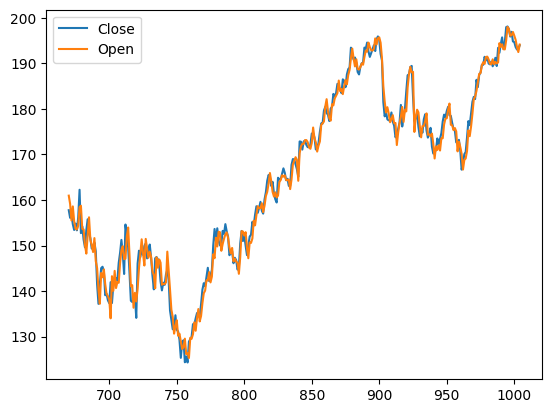

In [183]:
x_ouverture = df['Open'][split_time:] # l'analogue de x_valid avec 'Open' à la place de 'Close'

plt.plot(time_valid, x_valid, label = 'Close')
plt.plot(time_valid, x_ouverture, label = 'Open')
plt.legend()
plt.show()


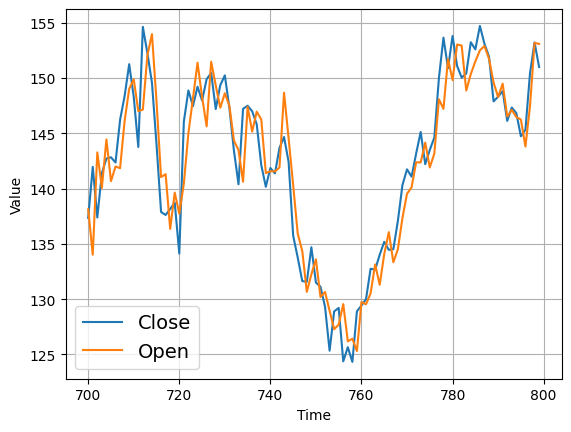

In [184]:
# On peut encore plus zoomer sur des intervalles de temps précis pour percevoir des différences certains jours

plot_series(time[700:800], df['Close'][700:800], label = 'Close')
plot_series(time[700:800], df['Open'][700:800], label = 'Open')
plt.show()

### II.3 - Comparaison des valeurs hautes et des valeurs faibles

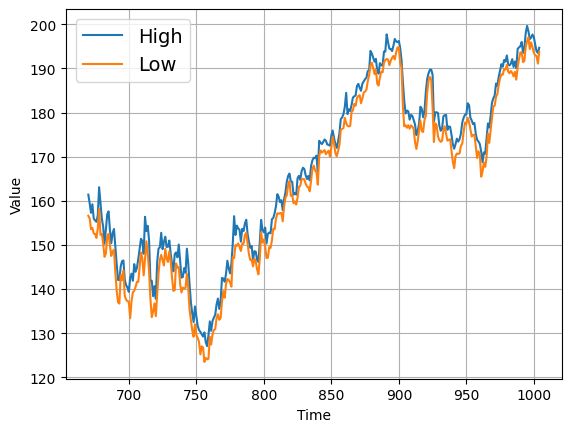

In [185]:
plot_series(time[split_time:], df['High'][split_time:], label = 'High')
plot_series(time[split_time:], df['Low'][split_time:], label = 'Low')
plt.show()

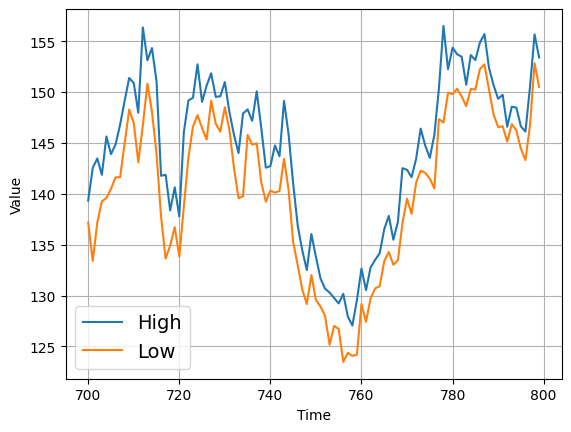

In [186]:
# En zoomant sur un passage intéressant

plot_series(time[700:800], df['High'][700:800], label = 'High')
plot_series(time[700:800], df['Low'][700:800], label = 'Low')
plt.show()

### II.4 - Volume de transaction chaque jour

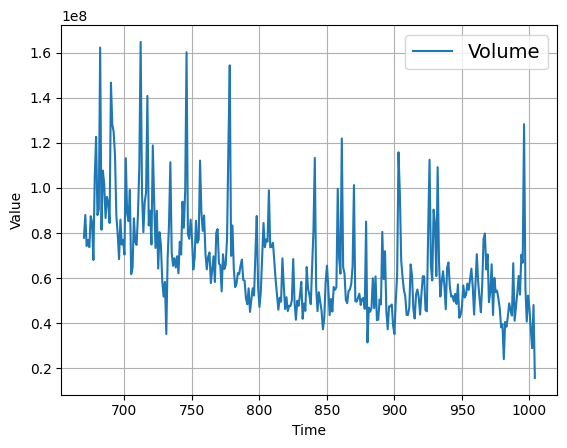

In [187]:
plot_series(time[split_time:], df['Volume'][split_time:], label = 'Volume')

## III - Modélisations pour prédire la valeur future.

In [188]:
df = df[['Date', 'Close']] # On ne garde que la variable de close qui est celle qui nous intéresse pour aller plus vite dans l'éxecution

df

,Date,Close
0,2020-01-02,73.152649
1,2020-01-03,72.441460
2,2020-01-06,73.018684
3,2020-01-07,72.675285
4,2020-01-08,73.844360
...,...,...
1000,2023-12-21,194.679993
1001,2023-12-22,193.600006
1002,2023-12-26,193.050003
1003,2023-12-27,193.149994


On rappelle le cours de l'action à partir de la moitié du temps écoulé depuis le 01/01/2020

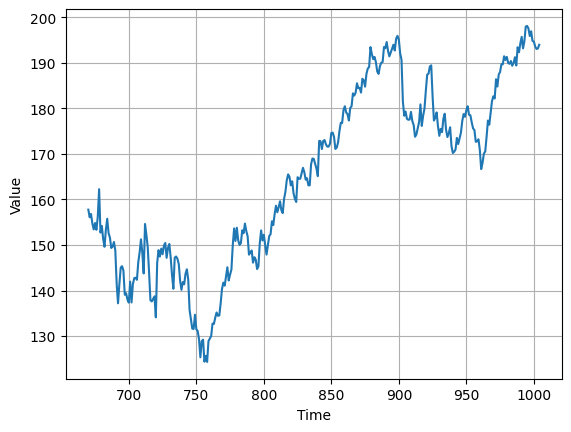

In [189]:
plot_series(time_valid, x_valid) # Visualisation du cours de l'action Apple plus récemment

## III-1 : Modèles simples, sans machine learning

### III-1.A - Moving Average / Moyennes Mouvantes

**Implémentation du modèle**

On peut implémenter notre modèle en un seul code.
Le principe du 'Moving Average' est que chaque valeur prédite par notre modèle est la moyenne des x précédentes valeurs où x est un paramètre à choisir.
Ce modèle permet une bonne prédiction mais surtout de lisser la courbe et son bruit.
Néanmoins l'erreur est supposée être assez importante comparé à des modèles plus developpés

In [190]:
def forecast_moyenne(series, window_size): # Implementation
  """La prochaine valeur est la moyenne des 'window_size' dernières valeurs"""

  forecast = [] # Crée une liste vide appelée forecast pour stocker les prévisions

  for time in range(len(series) - window_size): # On coupe à len(series) - window_size parce que sinon il n'y a plus assez de valeurs
                                                # Pour moyenner les window_size précédentes valeurs

    forecast.append(series[time:time + window_size].mean()) # Ajoute à la liste forecast la moyenne des valeurs sur l'intervalle de taille window size

  return np.array(forecast) # Convertit la liste forecast en un tableau numpy et le renvoie
                            # Ainsi on pourra l'exploiter par la suite

On crée alors notre tableau avec les valeurs modélisées par notre modèle

In [191]:
prix_forecast = forecast_moyenne(df['Close'], 30)[split_time - 30:] # Prédiction de la valeur du prix

# On commence en avance par rapport au temps qui nous intéresse pour pouvoir avoir 'window_size' de temps déja connus
# Ainsi on pourra faire la moyenne des 'window_size' (ici 30) précédentes valeurs pour que à partir de 'split_time'
# les valeurs soient uniquement des valeurs crées par notre modèle 

Première visualisation du résultat obtenu.

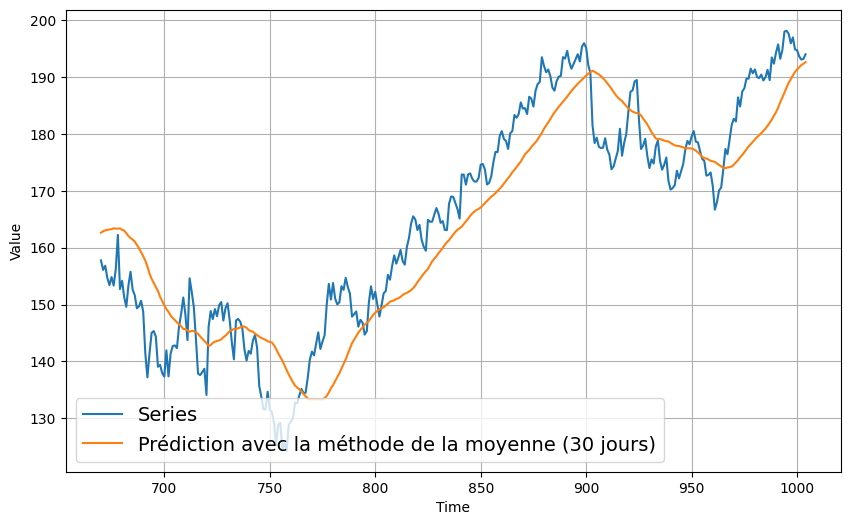

In [192]:
plt.figure(figsize=(10, 6)) # On compare 
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")

Le résultat est assez satisfaisant, on obtient une belle courbe qui capte bien les variations du cours de l'action.

Essayons de faire varier la fenêtre pour obtenir un modèle plus précis.

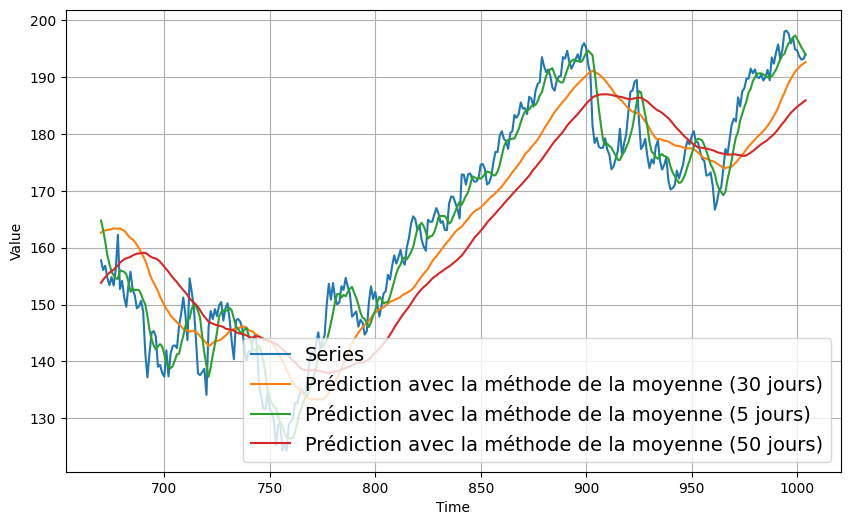

In [193]:
prix_forecast5 = forecast_moyenne(df['Close'], 5)[split_time - 5:]
prix_forecast50 = forecast_moyenne(df['Close'], 50)[split_time - 50:]

plt.figure(figsize=(10, 6)) # On compare 
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")
plot_series(time_valid, prix_forecast5, label = "Prédiction avec la méthode de la moyenne (5 jours)")
plot_series(time_valid, prix_forecast50, label = "Prédiction avec la méthode de la moyenne (50 jours)")

On comprend dans ce cas précis que le moins on prend de valeurs dans la fenêtre dont on fait la moyenne, et le plus sera précise notre prédiction.

### III-1.B - Naive forecast

Après avoir remarqué cela, on s'attaque ici dans un second temps à un second modèle sans machine learning.
Il s'agit du modèle de prévision naive où 'Naive Forecast' en anglais.
Le concept du modèle est que chaque valeur de notre modèle est la valeur à la date précédente de la courbe de base. On peut considérer cela comme un modèle de Moving Average avec une window size égale à 1.

Le modèle est donc très efficace pour les modèles qui ne sont pas soumis à d'énormes variations.

**Implémentation du modèle**

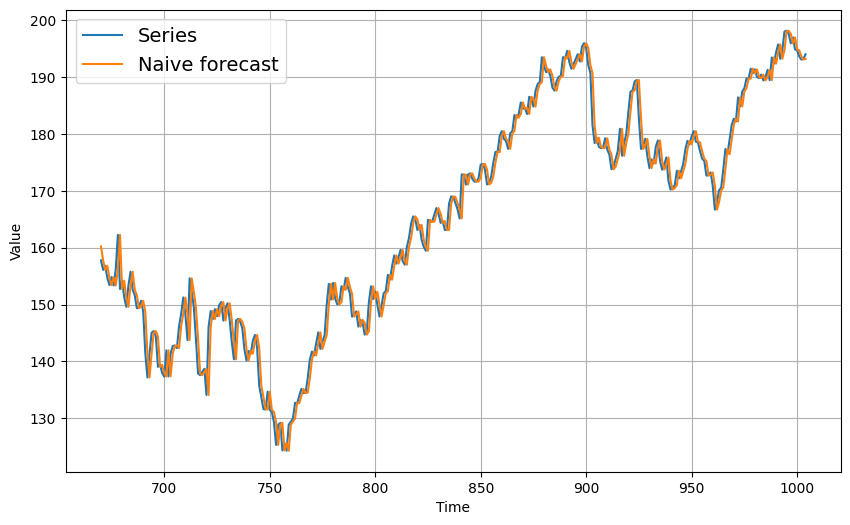

In [194]:
naive_forecast = df['Close'][split_time - 1:-1] # Avec le naive forecast

# Le naive forecast consiste à prédire chaque valeur par la valeur précedente du modèle
# Ici on commence donc à la valeur qui précède l'intervalle qui nous intéresse jusqu'à la fin

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label= "Naive forecast")

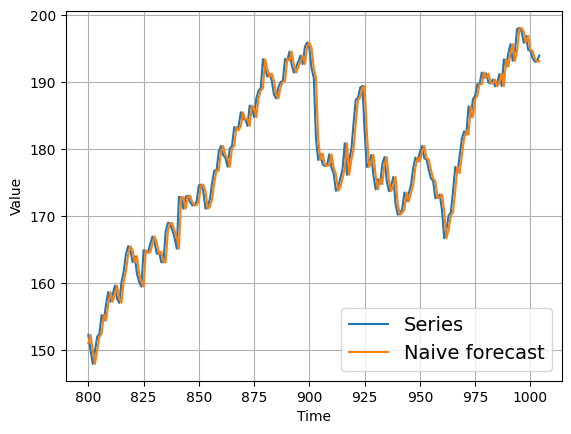

In [195]:
# On zoom sur l'efficacité du naive forecast 

split_time2 = 800
time_naive = time[split_time2:]
x_naive = df['Close'][split_time2:]
naive_forecast2 = df['Close'][split_time2 - 1:-1]
plot_series(time_naive, x_naive, label="Series")
plot_series(time_naive, naive_forecast2, label="Naive forecast")

### III-1.C - Comparaison des deux modèles

Superposons les deux modèles avant de comparer leurs erreurs respectives

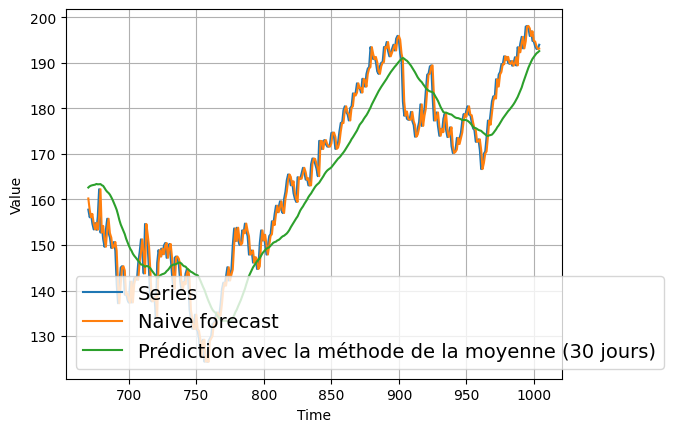

In [196]:
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label= "Naive forecast")
plot_series(time_valid, prix_forecast, label = "Prédiction avec la méthode de la moyenne (30 jours)")

Comparaison des erreurs des modèles

In [197]:
# Erreur des modèles 
import tensorflow as tf 

# Naive forecast 
erreur_naif = tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy() # On utilise le module d'erreurs de la librairie tensorflow
print(f"L'erreur du modèle naif est : {erreur_naif}")
# Mean Absolute Error : différence moyenne absolue

# Forecast moyen 
erreur_30j = tf.keras.metrics.mean_absolute_error(x_valid, prix_forecast).numpy() # On utilise le module d'erreurs de la librairie tensorflow
print(f"L'erreur du modèle de moving average sur 30 jours est : {erreur_30j}")

L'erreur du modèle naif est : 1.9279227185605177
L'erreur du modèle de moving average sur 30 jours est : 6.914448343912759


Le modèle de naive forecast est très efficace ici, tandis que l'erreur du modèle de moving average est assez importante. 
On peut tout de même essayer d'aller plus loin à l'aide d'un modèle faisant appel a du machine learning !

## III-2 - Modélisation avec du machine learning, modèle LSTM

### III-2.A : Préparation pour faire fonctionner le modèle

Le but du modèle choisi, modèle LSTM (Long short-term memory) est de garder quelques valeurs précedentes en mémoire pour prédire la prochaine valeur avec une manière de prédire plus complexe qu'une relation linéaire ou de moyenne.

On commence alors par créer une fonction qui va nous renvoyer notre dataframe avec des colonnes ajoutées : à savoir les valeurs de 'Close' aux 4 jours qui suivent notre date. La quatrième valeur est appelée "Target". Target est ainsi la valeur à T+4 de 'Close'

In [198]:
# On commence par définir nos décalages qui vont nous permettre de prendre les valeurs du futur 
shifts=[-1, -2, -3, -4]

In [199]:

def add_shifted_columns(df, shifts):
  
  for index, Target in enumerate(shifts): # On conserve l'index car il nous servira
                                             # On boucle sur toutes les valeurs pour ajouter toutes les colonnes

    df_temp=df['Close'].shift(Target) # Utilisation de la fonction shift de panda : 
                                         # df.['Close].shift[-1] renvoie la valeur suivante de Close (par rapport au temps dans la boucle)
    if index<(len(shifts)-1):
      col_name=f'Target - {index+1}' # On crée le nom de colonne Target - n (on réequilibre l'index qui commençait à 0)

    else:
      col_name='Target' # Si on est au bout de la liste de décalages, alors on a atteint notre target

    df[col_name]=df_temp # On ajoute la colonne avec son nouveau nom à notre tableau final à l'aide de notre tableau temporaire

    df['Target Date']=df['Date'].shift(-len(shifts)) # On ajoute la date associée au Target final

  return df


In [200]:
# Testons le résultat

df = add_shifted_columns(df,shifts)
df

/var/folders/md/_fklkl9s1z9gj6bpnwj204y40000gn/T/ipykernel_16532/1213912355.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name]=df_temp # On ajoute la colonne avec son nouveau nom à notre tableau final à l'aide de notre tableau temporaire
/var/folders/md/_fklkl9s1z9gj6bpnwj204y40000gn/T/ipykernel_16532/1213912355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target Date']=df['Date'].shift(-len(shifts)) # On ajoute la date associée au Target final
/var/folders/md/_fklkl9s1z9gj6bpnwj2

,Date,Close,Target - 1,Target Date,Target - 2,Target - 3,Target
0,2020-01-02,73.152649,72.441460,2020-01-08,73.018684,72.675285,73.844360
1,2020-01-03,72.441460,73.018684,2020-01-09,72.675285,73.844360,75.412857
2,2020-01-06,73.018684,72.675285,2020-01-10,73.844360,75.412857,75.583344
3,2020-01-07,72.675285,73.844360,2020-01-13,75.412857,75.583344,77.198151
4,2020-01-08,73.844360,75.412857,2020-01-14,75.583344,77.198151,76.155701
...,...,...,...,...,...,...,...
1000,2023-12-21,194.679993,193.600006,2023-12-28,193.050003,193.149994,193.975006
1001,2023-12-22,193.600006,193.050003,NaT,193.149994,193.975006,NaN
1002,2023-12-26,193.050003,193.149994,NaT,193.975006,NaN,NaN
1003,2023-12-27,193.149994,193.975006,NaT,NaN,NaN,NaN


In [201]:
# On replace Target Date au sein du tableau pour plus d'esthétique
ordre_colonnes = ['Date', 'Close', 'Target Date', 'Target - 1', 'Target - 2', 'Target - 3', 'Target']
df = df[ordre_colonnes]

On rappelle que l'existence de trous entre les dates est liée à la fermeture des marchés pendant les week-ends.

On entre plus en profondeur dans la modélisation, ainsi la date originale et la valeur originale de Close ne nous intéressent plus, il vient :

In [202]:
df=df.drop(['Date', 'Close'],axis=1) 

Par la suite, il faut aussi transformer le format de nos paramètres pour qu'ils conviennent à l'utilisation d'un modèle LSTM.
On crée une fonction qui va diviser en 3 catégories nos variables, (Date, Targets - n, Target) et les mettre au bon format.

Il s'agit d'adapter la forme des caractéristiques à une forme qui convient à l'entrée d'un modèle LSTM.

In [203]:
def formatage(df):

    # On commence par les dates 
    dates = df.iloc[:, 0].values

    # Puis les Targets intermédiaires 
    X = df.iloc[:, 1:-1].values.reshape(-1, df.shape[1] - 2, 1).astype(np.float32)

    # -1 : réorganiser les données tout en conservant le même nombre total d'éléments (convention)

    # df.shape[1] - 2 : la nouvelle taille de la deuxième dimension (nombre de colonnes)
                       # Donc ici on garde le nombre de Target intermédiaire en retirant Date et Target Final

    # 1 : Taille de la troisème dimension : représentation d'une série temporelle univariée

    # Et enfin on met le Target au bon format
    Y = df.iloc[:, -1].values.astype(np.float32)

    # De nombreux modèles préfèrent travailler avec des données en virgule flottante 32 bits 
    # plutôt qu'avec des types de données plus larges.

    return dates, X, Y


In [204]:
# On applique à notre data frame 

dates, X, Y = formatage(df) # X représente les Targets Intermédiaires, Y le Target Final

dates.shape, X.shape, Y.shape

((1005,), (1005, 3, 1), (1005,))

Maintenant que nos trois variables, 'dates', 'X' et 'Y' sont au bon format, il y a un autre prérequis au bon fonctionnement d'un modèle LSTM.
Il s'agit de la définition des périodes d'entraînement du modèle, de validation puis de test.
Comme nos variables sont désormées "formatées", elles sont beaucoup plus faciles à utiliser.

In [205]:
def train_val_test(dates, X, Y, train_ratio, val_ratio): # On connaît maintenant les formats des objets pour les découper

    train_index = int(len(dates) * train_ratio) # Nombre de dates sur lesquelles on va s'entraîner
    val_index = train_index + int(len(dates) * val_ratio) # Nombre de dates sur lesquelles on s'entraîne et on valide

    dates_train, X_train, Y_train = dates[:train_index], X[:train_index], Y[:train_index] # Période d'entraînement

    dates_val, X_val, Y_val = dates[train_index:val_index], X[train_index:val_index], Y[train_index: val_index] # Période de validation
    # (qui justifie la définition de val_index)

    dates_test, X_test, Y_test = dates[val_index:], X[val_index:], Y[ val_index:] # Période de test

    return (dates_train, X_train, Y_train), (dates_val, X_val, Y_val), (dates_test, X_test, Y_test)


In [206]:
# On applique à nos dates 

(dates_train, X_train, Y_train), (dates_val, X_val, Y_val), (dates_test, X_test, Y_test) = train_val_test(dates, X, Y, 0.8,0.1)

# On définit 80% d'entrainement, 10% de validation et 10% de test pour notre modèle

Visualisons alors sur notre courbe originale les périodes d'entraînement, de validation et de test du modèle.

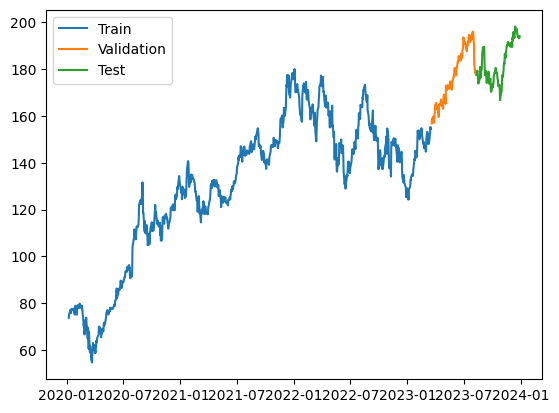

In [207]:
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['Train', 'Validation', 'Test']) # Il s'agit en fait de trois courbes 

### III-2.B : Implémentation du modèle

Il est alors l'heure d'expliciter le modèle maintenant que les préparatifs sont prêts. 
Il s'agit comme dit précedemment d'un modèle LSTM qui s'implémente sous la forme suivante :

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])


Maintenant, on entraîne le modèle sur l'intervalle qu'on lui a consacré pour son entraînement

In [209]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 17514.7656 - mean_absolute_error: 128.9453 - val_loss: 30779.8281 - val_mean_absolute_error: 175.0512
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 16899.1445 - mean_absolute_error: 126.4911 - val_loss: 29134.3379 - val_mean_absolute_error: 170.2835
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 14419.6367 - mean_absolute_error: 116.0128 - val_loss: 23010.0879 - val_mean_absolute_error: 151.2225
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 7334.9697 - mean_absolute_error: 78.4375 - val_loss: 8485.3672 - val_mean_absolute_error: 91.3291
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 1303.6552 - mean_absolute_error: 29.8172 - val_loss: 1636.7180 - val_mean_absolute_error: 38.7319
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 895.6616 - mean_absolute_error: 23.2054 - val_loss: 2330.293

Avec 100 epochs, il semblerait que l'erreur entre la modélisation et la réalité de la période de validation stagne rapidement, et qu'il n'est pas nécéssaire de s'entrainer autant. Vérifions cela avec des courbes.

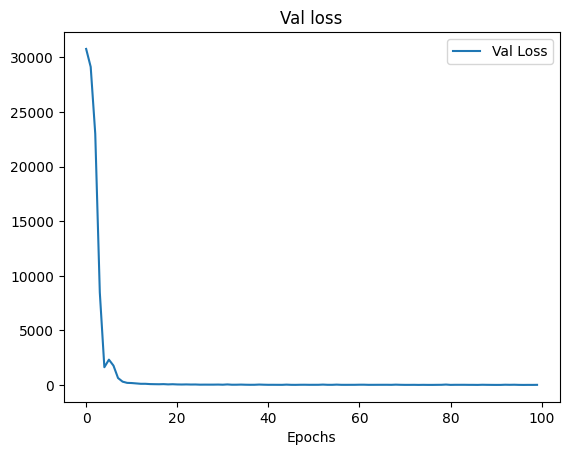

In [210]:
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Val loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Il semble en effet que le modèle souffre d'overfitting.

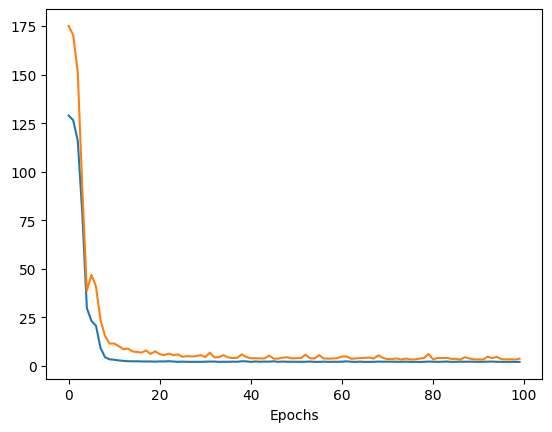

In [211]:
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel('Epochs')
plt.show()

De même avec les autres indicateurs. Il faut donc réussir à arrêter l'entrainement du modèle au bon moment.


Nous allons alors implementer de l'EarlyStopping pour que le modèle s'arrête lorsqu'il ne s'améliore plus, voire se détériore.

In [212]:
from keras.callbacks import EarlyStopping # On importe la méthode

In [213]:
# Puis on la configure
early_stopping = EarlyStopping(
    monitor='val_loss',  # la métrique à surveiller : on ne veut pas que l'erreur de la période de validation ne remonte
    min_delta=0.001,     # changement minimum pour être considéré comme une amélioration
    patience=10,         # nombre d'epochs sans amélioration après lesquelles l'entraînement sera arrêté
    verbose=1,           # pour afficher des messages
    mode='auto' )         # le mode peut être 'auto', 'min', ou 'max'

In [214]:
# On ajoute ça à notre modèle

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 8.0300 - mean_absolute_error: 2.1658 - val_loss: 22.0360 - val_mean_absolute_error: 3.6059
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 8.5059 - mean_absolute_error: 2.2358 - val_loss: 34.6252 - val_mean_absolute_error: 4.8818
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 8.0035 - mean_absolute_error: 2.1299 - val_loss: 17.0723 - val_mean_absolute_error: 3.2124
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 9.0631 - mean_absolute_error: 2.3472 - val_loss: 16.6243 - val_mean_absolute_error: 3.1743
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 8.1443 - mean_absolute_error: 2.1380 - val_loss: 42.2967 - val_mean_absolute_error: 5.6969
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 10.0600 - mean_absolute_error: 2.4531 - val_loss: 29.9111 - val_mean_absolute_error: 4.3593
Epoch 7/100
26/

Maintenant que notre modèle s'est entraîné, il est l'heure de voir si son entraînement a été efficace

I - 3 : Visualisation du modèle

26/26 [==============================] - 0s 574us/step


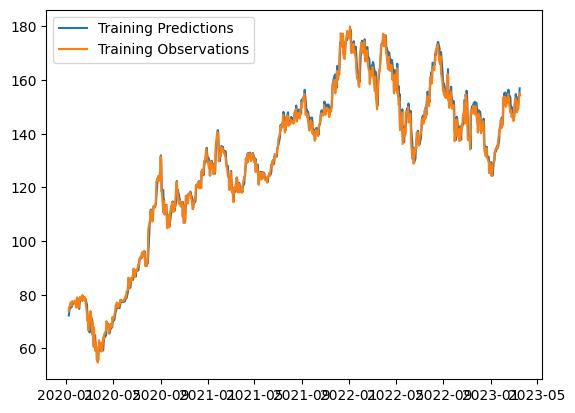

In [215]:
# Intervalle d'entraînement 

train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 834us/step


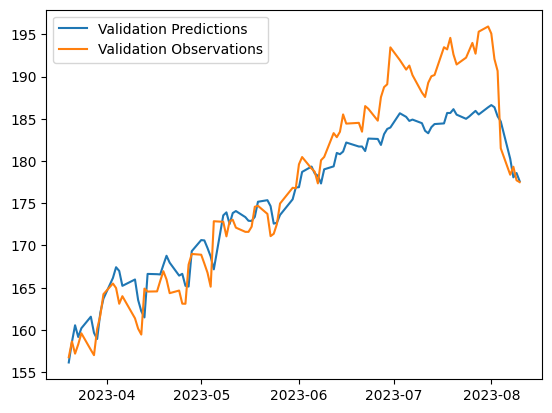

In [216]:
# De même avec la période de validation 

val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 754us/step


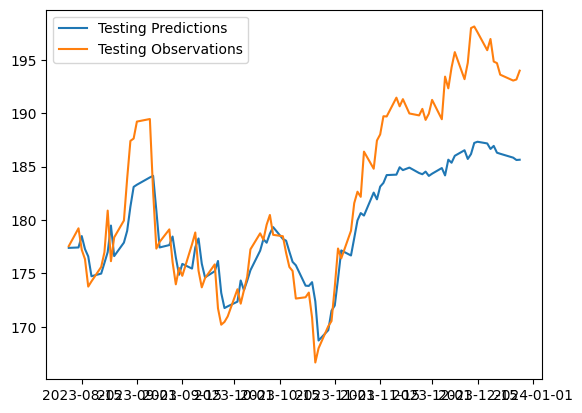

In [217]:
# Et enfin sur la partie de tests :

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

On peut essayer de tout regrouper pour avoir une vue d'ensemble de notre modèle comparé à la réalité !

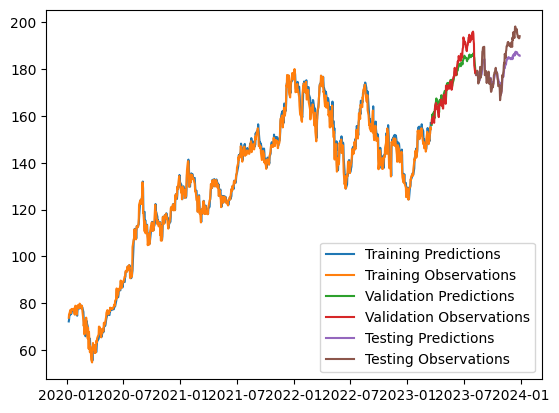

In [218]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

### III-2.C Erreurs du modèle

In [219]:
import tensorflow as tf

In [220]:
print(tf.keras.metrics.mean_absolute_error(train_predictions, Y_train).numpy())
print(tf.keras.metrics.mean_absolute_error(val_predictions, Y_val).numpy())

2.181634
3.2715893


L'erreur est assez faible, logiquement, sur ses périodes d'entraînement et de validation.
Intéressons nous désormais à l'erreur du modèle sur sa période de test

En raison du modèle que nous avons utilisé, avec le système de 'Target', il se crée 4 futures dates (ici appelées NaN autoamtiquement du coup), qui apparaissent dans dates_test

In [221]:
print(dates_test)

['2023-08-11T00:00:00.000000000' '2023-08-14T00:00:00.000000000'
 '2023-08-15T00:00:00.000000000' '2023-08-16T00:00:00.000000000'
 '2023-08-17T00:00:00.000000000' '2023-08-18T00:00:00.000000000'
 '2023-08-21T00:00:00.000000000' '2023-08-22T00:00:00.000000000'
 '2023-08-23T00:00:00.000000000' '2023-08-24T00:00:00.000000000'
 '2023-08-25T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-08-29T00:00:00.000000000' '2023-08-30T00:00:00.000000000'
 '2023-08-31T00:00:00.000000000' '2023-09-01T00:00:00.000000000'
 '2023-09-05T00:00:00.000000000' '2023-09-06T00:00:00.000000000'
 '2023-09-07T00:00:00.000000000' '2023-09-08T00:00:00.000000000'
 '2023-09-11T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-09-15T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-20T00:00:00.000000000'
 '2023-09-21T00:00:00.000000000' '2023-09-22T00:00:00.000000000'
 '2023-09-25T00:00:00.000

Ainsi, à chacune de ces dates est associée la valeur réelle de l'action, et comme les valeurs futures ne sont pas dans le modèle de base, la valeur affichée est nan.

In [222]:
print(Y_test)

[177.55608 179.22389 177.21652 176.33769 173.77107 174.26042 175.60864
 176.99681 180.8817  176.14793 178.375   179.95293 183.87775 187.4031
 187.62282 189.21074 189.45041 182.66934 177.32639 177.94556 179.12401
 176.06804 173.98079 175.50879 174.77972 177.73584 178.8344  175.25911
 173.70116 174.56001 175.84833 171.73375 170.20575 170.46542 170.98474
 173.5214  172.17317 173.43152 174.67987 177.25648 178.7545  178.15529
 179.56343 180.47224 178.61469 178.48486 176.91692 175.60864 175.22916
 172.65254 172.77238 173.2118  170.8749  166.67043 167.99867 170.06593
 170.54532 173.7411  177.33638 176.41757 178.99419 181.58078 182.64937
 182.17    186.4     184.8     187.44    188.01    189.71    189.69
 191.45    190.64    191.31    189.97    189.79    190.4     189.37
 189.95    191.24    189.43    193.42    192.32    194.27    195.71
 193.18    194.71    197.96    198.11    197.57    195.89    196.94
 194.83    194.68    193.6     193.05    193.15    193.975         nan
       nan       na

Cependant, notre modèle de prédiction a crée une valeur pour la date qui suit l'extraction du fichier (ici le 27 octobre), et ne comporte donc plus que 3 dates sans valeur associée

In [223]:
print(test_predictions)

[177.39407 177.43164 178.49991 177.27927 176.59583 174.73933 174.98907
 175.9877  176.9956  179.48221 176.62376 177.8893  178.98636 181.24738
 183.10004 183.3014  183.98624 184.13278 180.88867 177.43271 177.65607
 178.45503 176.49545 174.87302 175.89322 175.45543 177.44028 178.27673
 175.91913 174.63228 175.20882 176.1687  173.17738 171.76201 171.92282
 172.36176 174.34283 173.43655 174.31694 175.2988  177.13072 178.20667
 177.87567 178.72879 179.33673 178.22723 178.06648 177.04424 176.08197
 175.76553 173.8572  173.83353 174.18542 172.38873 168.72516 169.6945
 171.51727 172.00198 174.48615 177.15463 176.68187 178.30856 179.96521
 180.6518  180.41673 182.56718 181.93521 183.12752 183.47182 184.20505
 184.24496 184.93648 184.67091 184.90512 184.39673 184.28464 184.52939
 184.12732 184.33513 184.86426 184.17496 185.64508 185.36087 186.00963
 186.52928 185.71405 186.17325 187.21341 187.3238  187.16672 186.64883
 186.93437 186.29976 186.20064 185.83578 185.617   185.64111 185.93134
       

Pour calculer l'erreur moyenne selon la méthode mean absolute error du modèle sur la partie test, nous allons devoir nous débarasser des 'nan'.

In [224]:
# Ainsi on cherche d'abord les indices dont se débarasser 
nan_indices_test_predictions = np.isnan(test_predictions)
print("Indices des valeurs nan dans test_predictions:", np.where(nan_indices_test_predictions)[0])

nan_indices_Y_test = np.isnan(Y_test)
print("Indices des valeurs nan dans Y_test:", np.where(nan_indices_Y_test)[0])

Indices des valeurs nan dans test_predictions: [ 98  99 100]
Indices des valeurs nan dans Y_test: [ 97  98  99 100]


Et on calcule l'erreur de notre modèle comparé à la réalité, l'erreur de la période de test étant celle qui compte réellement pour vérifier que le modèle marche bien.

In [225]:
premier_nan =  np.where(nan_indices_Y_test)[0][0] # la première date manquante dans nos dates de la période de test

In [232]:
erreur_lstm = tf.keras.metrics.mean_absolute_error(test_predictions[:premier_nan], Y_test[:premier_nan]).numpy()
print(f"L'erreur du modèle LSTM est : {erreur_lstm}")

L'erreur du modèle LSTM est : 3.7492711544036865


Rappelons l'erreur que nous trouvions avec le modèle naif, qui était le plus efficace sans machine learning :

In [233]:
print(f"L'erreur du modèle naif est : {erreur_naif}")

L'erreur du modèle naif est : 1.9279227185605177


L'erreur est supérieure à ce que nous trouvions avec le modèle de naive forecasting.

### III-2.D - Conclusion sur le choix du modèle

Avec le modèle LTSM, on obtient toujours une erreur plus importante que sur un modèle simple tel que le naive forecasting.

Ainsi, pour déterminer la valeur de l'action demain, nous allons nous fier à la valeur donnée par le modèle de naive forecasting plutôt que la valeur donnée par le modèle LSTM. C'est ce modèle que nous allons éxecuter dans le dossier AlgoTrading.

## IV - Bonus - Prédiction de la valeur future avec le LSTM

On a vu que le modèle plus efficace pour prédire l'action du lendemain était le modèle de naive forecasting

Mais, pour tout de même utiliser notre modèle LSTM, on peut s'intéresser à la valeur du lendemain prédite même si elle est théoriquement plus éloignée de la réalité que ce donne le modèle du naive forecasting.

On cherche dans un premier temps l'indice de la valeur qu'on cherche à prédire

In [227]:
indice_prediction = np.where(nan_indices_Y_test)[0][0] # Indice de la valeur ou le modèle a crée une valeur

C'est la première date à partir de laquelle il n'y pas de valeur de prix associée, c'est donc la date de demain à laquelle le modèle va associer une prédiction.

Voici la prédiction associée :

In [228]:
valeur_prediction = test_predictions[indice_prediction]
valeur_prediction

185.93134

Il s'agit alors de comparer avec la valeur précedente, et dire si on achète ou non :

In [229]:
def acheter_ou_non():
   if valeur_prediction > test_predictions[indice_prediction-1]:
      return 'ACHETER'
   else:
      return 'NE PAS ACHETER'

acheter_ou_non()

'ACHETER'

Le résultat peut être différent de ce que nous trouverons avec le modèle de naive forecasting, qui est le vrai modèle à suivre dans le cadre du projet.